In [161]:
# Importing all the libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import seaborn as sns
import urllib.request
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = None

# Project 4: @WeRateDogs (Twitter)

## Table of Contents

1. [Gathering Data](#gat)\
    1.1 [The WeRateDogs Twitter archive](#wrd)\
    1.2 [The tweet image predictions](#tip)\
    1.3 [The earch tweet retweet and favorite count](#rfc)
2. [Assessing Data](#asses)
3. [Data issues](#di)\
    3.1 [Quality](#qua)\
    3.2 [Tidiness](#tid)
4. [Cleaning Data](#clean)
5. [Analysis](#sis)
6. [Guiding Questions](#gques)\
    6.1 [Q1: What about the popularity (Count of Retweets) of the @WeRateDogs Twitter account over time?](#q1)\
    6.2 [Q2: What about the most retweeted dog?](#q2)\
    6.3 [Q3: What are the top 5 most rated breeds?](#q3)\
    6.4 [Q4: What is the most popular stage in dog's life?](#q4)\
    6.5 [Q5: Are the high rated dogs the ones who are most favorited on twitter?](#q5)\
    6.6 [Q6: Is there a relationship between retweets and favorites?](#q6)\
    6.7 [Q7: Who are the most favorited dogs (Top 5)?](q#7)
    
    


<a id='gat'></a>
### 1.  Gathering Data 

<a id='wrd'></a>
1.1 The WeRateDogs Twitter archive

In [2]:
# Reading the csv archive
t_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Testing the reading
t_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


<a id='tip'></a>
1.2 The tweet image predictions

In [4]:
#Downloading programmatically image predictions (neural network)
webpage="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(webpage)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

# Reading the tsv archive
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [5]:
# Testing the reading
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<a id='rfc'></a>
1.3 The each tweet retweet and favorite count

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = t_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
# Reading the JSON txt file
tweets = open('tweet-json.txt', "r")

data = []
for line in tweets:
    try:
        tweet = json.loads(line)
        data.append(tweet)
    except:
        continue
        
tweets.close()

In [7]:
# Making a data frame from a list, and line by line

tweets_data = []

for entry in data:
    tweets_data.append({
        'tweet_id': entry['id'],
        'retweet_count': entry['retweet_count'],
        'favorite_count': entry['favorite_count']
    })

tweets_frame = pd.DataFrame(tweets_data, columns=['tweet_id', 'retweet_count', 'favorite_count'])

In [8]:
# Checking for the new dataframe
tweets_frame.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='asses'></a>
### 2. Assessing data

In [ ]:
#1. t_archive:
t_archive.head()

In [ ]:
# Obteniendo la info del dataframe 
t_archive.info()

In [ ]:
# Descriptivos del dataframe
t_archive.describe()

In [ ]:
# 2. image_predictions:
image_predictions.head()

In [ ]:
# Obteniendo la info del dataframe
image_predictions.info()

In [ ]:
# Descriptivos del dataframe
image_predictions.describe()

In [ ]:
#3.tweets_frame:
tweets_frame.head()

In [ ]:
# Obteniendo la info del dataframe
tweets_frame.info()

In [ ]:
# Descriptivos del dataframe
tweets_frame.describe()

In [ ]:
# Histogramas del dataframe (because those are 3 variable of numerical data)
tweets_frame.hist()

<a id='di'></a>
### 3. Data issues

<a id='qua'></a>
#### 3.1 Data quality issues:
1. In t_archive remove the retweets and replies with "retweeted_status_id" are not NaN.
2. Removing the columns that I'm not gonna use because I don't need to analyze the retweets:'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', and 'in_reply_to_user_id'.
3. Set the None values to np.nan in all the 4 dog stage columns.
4. The "name" columns has no missing values BUT when you look at the value counts appears 745 "None" that are missing values anyway. Cleaning the no valid names, and the None to np.nan
5. Finding the wrong rating numerators, those who are decimal, and replace them.
6. Looking for the rating denominators that are not equal to ten (those are wrong): Outliers for rating_numerator (all the dog should rate over 10: Because they are good dogs!!) and the outliers 1700, and 450. 
7. Need to create a function for the best prediction of breed
8. The data source image_predictions has 2075 entries, so many dogs were not recognized.

<a id='tid'></a>
#### 3.2 Data tidiness issues:
9. There are multiple "dog age" columns presents and they should be merged into 1 column "dog_age".
10. The 3 sources of data: image_predictions, twitter_archive, and twitter api could be merged by the id into one dataframe to work with.

<a id='clean'></a>
### 4. Cleaning data

In [106]:
# Creating a copy for each data set to clean it
t_archive_2 = t_archive.copy()
image_predictions_2 = image_predictions.copy()
tweets_frame_2 = tweets_frame.copy()

In [107]:
# Issue nº1: Remove the retweets and replies with retweeted_Status_id

to_remove_retweets = t_archive_2.query("retweeted_status_id != 'NaN'").index.tolist()
print(to_remove_retweets)

to_remove_replies = t_archive_2.query("in_reply_to_status_id != 'NaN'").index.tolist()
print(to_remove_replies)

[19, 32, 36, 68, 73, 74, 78, 91, 95, 97, 101, 109, 118, 124, 130, 132, 137, 146, 155, 159, 160, 165, 171, 180, 182, 185, 194, 195, 204, 211, 212, 222, 230, 231, 247, 250, 260, 266, 272, 273, 281, 285, 286, 289, 298, 302, 303, 307, 309, 310, 319, 327, 332, 340, 341, 343, 357, 359, 366, 382, 386, 397, 399, 406, 411, 415, 420, 422, 425, 431, 434, 435, 438, 446, 447, 450, 453, 455, 462, 465, 469, 475, 476, 479, 485, 488, 506, 522, 530, 535, 538, 541, 543, 546, 552, 555, 558, 561, 566, 568, 574, 577, 581, 583, 586, 589, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 612, 615, 618, 627, 629, 634, 654, 655, 656, 661, 664, 669, 671, 677, 682, 686, 692, 694, 702, 720, 728, 741, 742, 745, 749, 753, 759, 764, 767, 770, 773, 778, 784, 794, 800, 811, 815, 818, 822, 826, 829, 833, 841, 847, 860, 868, 872, 885, 890, 895, 908, 911, 926, 937, 943, 949, 1012, 1023, 1043, 1242, 2259, 2260]
[30, 55, 64, 113, 148, 149, 179, 184, 186, 188, 189, 218, 228, 234, 251, 274, 290, 291, 313, 342, 

In [108]:
# Removing the rows of reteets
t_archive_2 = t_archive_2.drop(to_remove_retweets, axis=0)

In [109]:
# Removing the rows of reteets
t_archive_2 = t_archive_2.drop(to_remove_replies, axis=0)

In [110]:
# Issue nº2: Removing the columns I'm not gonna use
t_archive_2 = t_archive_2.drop(['retweeted_status_id',
                                'retweeted_status_user_id',
                                'retweeted_status_timestamp',
                               'in_reply_to_status_id',
                               'in_reply_to_user_id'], 1)

In [111]:
# Checking the changes
t_archive_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


In [112]:
# Issue nº3: Set the None values to np.nan in all the 4 dog stage columns:
t_archive_2['doggo'].replace('None', '', inplace=True)
t_archive_2['floofer'].replace('None', '', inplace=True)
t_archive_2['pupper'].replace('None', '', inplace=True)
t_archive_2['puppo'].replace('None', '', inplace=True)

In [113]:
# Issue nº9: Then combine stage columns.
t_archive_2['stage'] = t_archive_2.doggo + t_archive_2.floofer + t_archive_2.pupper + t_archive_2.puppo

In [114]:
# Then format entries with multiple dog stages which appeared like doggopupper.
t_archive_2.loc[t_archive_2.stage == 'doggopupper', 'stage'] = 'multiple' 
t_archive_2.loc[t_archive_2.stage == 'doggopuppo', 'stage'] = 'multiple' 
t_archive_2.loc[t_archive_2.stage == 'doggofloofer', 'stage'] = 'multiple'

In [115]:
#Remove the original 4 columns of dog stages
t_archive_2 = t_archive_2.drop(['doggo','pupper','floofer','puppo'], 1)

In [116]:
#Checking the changes
t_archive_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   stage               2097 non-null   object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


In [117]:
# Looking for the frequency of "stage"
t_archive_2.stage.value_counts()

            1761
pupper       221
doggo         72
puppo         23
multiple      11
floofer        9
Name: stage, dtype: int64

In [118]:
# Issue nº4: Removing the no valid names (the ones in lowercase like "the", "quite", "unacceptable", etc):
mask = t_archive_2.name.str.islower() 
column_name = 'name' 
t_archive_2.loc[mask, column_name] = np.nan

In [119]:
#Removing the "None" names:
t_archive_2['name'].replace('None', '', inplace=True)

In [120]:
#Checking
t_archive_2.name.value_counts()

                  603
Lucy               11
Charlie            11
Cooper             10
Oliver             10
Tucker              9
Penny               9
Lola                8
Sadie               8
Winston             8
Toby                7
Daisy               7
Bo                  6
Oscar               6
Stanley             6
Bailey              6
Koda                6
Bella               6
Jax                 6
Louis               5
Milo                5
Dave                5
Leo                 5
Buddy               5
Rusty               5
Chester             5
Bentley             5
Scout               5
Gus                 4
Oakley              4
Gary                4
Jack                4
Reggie              4
Winnie              4
Maggie              4
Bear                4
Jerry               4
Phil                4
Sammy               4
George              4
Chip                4
Alfie               4
Clark               4
Larry               4
Clarence            4
Sophie    

In [121]:
# Changing the rating numerator to float type
t_archive_2 = t_archive_2.astype({"rating_numerator": float})

In [122]:
# Checking
t_archive_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   expanded_urls       2094 non-null   object 
 5   rating_numerator    2097 non-null   float64
 6   rating_denominator  2097 non-null   int64  
 7   name                1993 non-null   object 
 8   stage               2097 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 163.8+ KB


In [123]:
# Issue nº5: Finding the wrong rating numerators
t_archive_2[t_archive_2.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/Users/mixiz/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5.0
695,"This is Logan, the Chow who lived. He solemnly...",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0
1712,Here we have uncovered an entire battalion of ...,26.0


In [124]:
# Identifying decimal numerator:
rating = t_archive_2.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
t_archive_2['rating_numerator'] = rating['rating_numerator'].astype(float)
t_archive_2['rating_denominator'] = rating['rating_denominator'].astype(float)

In [125]:
# Checking:
t_archive_2[t_archive_2.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/Users/mixiz/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13.50
695,"This is Logan, the Chow who lived. He solemnly...",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1712,Here we have uncovered an entire battalion of ...,11.26


In [126]:
# Issue nº6: Looking for the rating denominators that are not equal to ten (those are wrong):
rating_d = t_archive_2.query('rating_denominator != 10').index.tolist()
rating_d

[433,
 516,
 902,
 1068,
 1120,
 1165,
 1202,
 1228,
 1254,
 1274,
 1351,
 1433,
 1635,
 1662,
 1779,
 1843,
 2335]

In [127]:
#Removing those cases:
t_archive_2 = t_archive_2.drop(rating_d, axis=0)

In [128]:
#Checking:
t_archive_2.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.080000e+03,2080.000000,2080.0
mean,7.367027e+17,11.656144,10.0
std,6.724699e+16,39.789764,0.0
min,6.660209e+17,0.000000,10.0
25%,6.767367e+17,10.000000,10.0
50%,7.097095e+17,11.000000,10.0
75%,7.880674e+17,12.000000,10.0
max,8.924206e+17,1776.000000,10.0


In [129]:
# Outliers for rating_numerator (all the dog should rate over 10: Because they are good dogs!!)
remove = t_archive_2.query('rating_numerator < 10').index.tolist()
print(len(remove))

415


In [130]:
# Removing the 415 cases:
t_archive_2 = t_archive_2.drop(remove, axis=0)

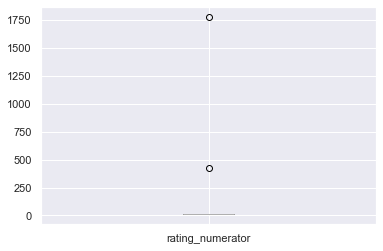

In [131]:
# The max for rating numerator is too high, this boxplot will help me to understand which are the outliers:
boxplot = t_archive_2.boxplot(column=['rating_numerator'])

In [132]:
# Removing the extremly high ones:
remove_highs = t_archive_2.query('rating_numerator > 250').index.tolist()
print(len(remove_highs))

t_archive_2 = t_archive_2.drop(remove_highs, axis=0)

2


In [133]:
# Checking
t_archive_2.describe()

,tweet_id,rating_numerator,rating_denominator
count,1.663000e+03,1663.000000,1663.0
mean,7.490813e+17,11.445598,10.0
std,6.857299e+16,1.120906,0.0
min,6.660508e+17,10.000000,10.0
25%,6.844706e+17,10.000000,10.0
50%,7.376787e+17,11.000000,10.0
75%,8.070585e+17,12.000000,10.0
max,8.924206e+17,14.000000,10.0


IMAGE PREDICTIONS CLEANING PROCESS

In [134]:
# Issue nº7: Creating a function for the best prediction of breed
breed = []
confidence = []

def image(image_predictions_2):
    if image_predictions_2['p1_dog'] == True:
        breed.append(image_predictions_2['p1'])
        confidence.append(image_predictions_2['p1_conf'])
    elif image_predictions_2['p2_dog'] == True:
        breed.append(image_predictions_2['p2'])
        confidence.append(image_predictions_2['p2_conf'])
    elif image_predictions_2['p3_dog'] == True:
        breed.append(image_predictions_2['p3'])
        confidence.append(image_predictions_2['p3_conf'])
    else:
        breed.append('None')
        confidence.append('None')

image_predictions_2.apply(image, axis=1)

#create new columns
image_predictions_2['breed'] = breed
image_predictions_2['confidence'] = confidence

In [135]:
image_predictions_2.breed.value_counts()

None                              324
golden_retriever                  173
Labrador_retriever                113
Pembroke                           96
Chihuahua                          95
pug                                65
toy_poodle                         52
chow                               51
Samoyed                            46
Pomeranian                         42
malamute                           34
cocker_spaniel                     34
French_bulldog                     32
Chesapeake_Bay_retriever           31
miniature_pinscher                 26
Cardigan                           23
Eskimo_dog                         22
Staffordshire_bullterrier          22
beagle                             21
German_shepherd                    21
Shih-Tzu                           20
Siberian_husky                     20
Maltese_dog                        19
Shetland_sheepdog                  19
Lakeland_terrier                   19
kuvasz                             19
Rottweiler  

In [136]:
# Issue nº8: Removing the None, changing those for NaN
image_predictions_2['breed'].replace('None', np.nan, inplace=True)

In [137]:
#Checking
image_predictions_2.breed.value_counts()

golden_retriever                  173
Labrador_retriever                113
Pembroke                           96
Chihuahua                          95
pug                                65
toy_poodle                         52
chow                               51
Samoyed                            46
Pomeranian                         42
malamute                           34
cocker_spaniel                     34
French_bulldog                     32
Chesapeake_Bay_retriever           31
miniature_pinscher                 26
Cardigan                           23
Eskimo_dog                         22
Staffordshire_bullterrier          22
beagle                             21
German_shepherd                    21
Siberian_husky                     20
Shih-Tzu                           20
kuvasz                             19
Lakeland_terrier                   19
Rottweiler                         19
Maltese_dog                        19
Shetland_sheepdog                  19
basset      

In [138]:
#Delete unuseful columns
image_predictions_2 = image_predictions_2.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

In [139]:
# Issue nº10: Merging the 3 dataframes, left join by id of the tweet

t_archive_2 = pd.merge(t_archive_2, image_predictions_2, how='left', on='tweet_id')
data = pd.merge(t_archive_2, tweets_frame_2, how='left', on='tweet_id')

In [140]:
data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,breed,confidence,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,None,8853,39467
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514,33819
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4328,25461
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,8964,42908
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,9774,41048


In [141]:
# Checking for all the properties of the merged dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 0 to 1662
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1663 non-null   int64  
 1   timestamp           1663 non-null   object 
 2   source              1663 non-null   object 
 3   text                1663 non-null   object 
 4   expanded_urls       1660 non-null   object 
 5   rating_numerator    1663 non-null   float64
 6   rating_denominator  1663 non-null   float64
 7   name                1598 non-null   object 
 8   stage               1663 non-null   object 
 9   jpg_url             1544 non-null   object 
 10  breed               1376 non-null   object 
 11  confidence          1544 non-null   object 
 12  retweet_count       1663 non-null   int64  
 13  favorite_count      1663 non-null   int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 194.9+ KB


In [142]:
# Last changes in datatypes
data = data.astype({"tweet_id": object, "timestamp": 'datetime64'})

In [143]:
#Checking:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 0 to 1662
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1663 non-null   object        
 1   timestamp           1663 non-null   datetime64[ns]
 2   source              1663 non-null   object        
 3   text                1663 non-null   object        
 4   expanded_urls       1660 non-null   object        
 5   rating_numerator    1663 non-null   float64       
 6   rating_denominator  1663 non-null   float64       
 7   name                1598 non-null   object        
 8   stage               1663 non-null   object        
 9   jpg_url             1544 non-null   object        
 10  breed               1376 non-null   object        
 11  confidence          1544 non-null   object        
 12  retweet_count       1663 non-null   int64         
 13  favorite_count      1663 non-null   int64       

In [144]:
# Checking for the descriptive info of the merged dataset:
data.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1663.000000,1663.0,1663.000000,1663.000000
mean,11.445598,10.0,3308.139507,10579.850271
std,1.120906,0.0,5144.547188,13130.263317
min,10.000000,10.0,16.000000,81.000000
25%,10.000000,10.0,788.500000,2598.500000
50%,11.000000,10.0,1813.000000,5760.000000
75%,12.000000,10.0,3832.000000,13883.000000
max,14.000000,10.0,79515.000000,132810.000000


In [145]:
# Saving the final csv file
data.to_csv('twitter_archive_master.csv', index=False)

<a id='sis'></a>
### 5. Analysis

In [146]:
final = pd.read_csv('twitter_archive_master.csv')

In [147]:
final.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,breed,confidence,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,None,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514,33819
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4328,25461
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,8964,42908
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,9774,41048


In [148]:
final.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1.663000e+03,1663.000000,1663.0,1663.000000,1663.000000
mean,7.490813e+17,11.445598,10.0,3308.139507,10579.850271
std,6.857299e+16,1.120906,0.0,5144.547188,13130.263317
min,6.660508e+17,10.000000,10.0,16.000000,81.000000
25%,6.844706e+17,10.000000,10.0,788.500000,2598.500000
50%,7.376787e+17,11.000000,10.0,1813.000000,5760.000000
75%,8.070585e+17,12.000000,10.0,3832.000000,13883.000000
max,8.924206e+17,14.000000,10.0,79515.000000,132810.000000


In [149]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663 entries, 0 to 1662
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1663 non-null   int64  
 1   timestamp           1663 non-null   object 
 2   source              1663 non-null   object 
 3   text                1663 non-null   object 
 4   expanded_urls       1660 non-null   object 
 5   rating_numerator    1663 non-null   float64
 6   rating_denominator  1663 non-null   float64
 7   name                1133 non-null   object 
 8   stage               292 non-null    object 
 9   jpg_url             1544 non-null   object 
 10  breed               1376 non-null   object 
 11  confidence          1544 non-null   object 
 12  retweet_count       1663 non-null   int64  
 13  favorite_count      1663 non-null   int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 182.0+ KB


<a id='gques'></a>
### 6. Guiding Questions

<a id='q1'></a>
### Question 1: What about the popularity (Count of Retweets) of the @WeRateDogs Twitter account over time?

Text(0, 0.5, 'Count Retweets')

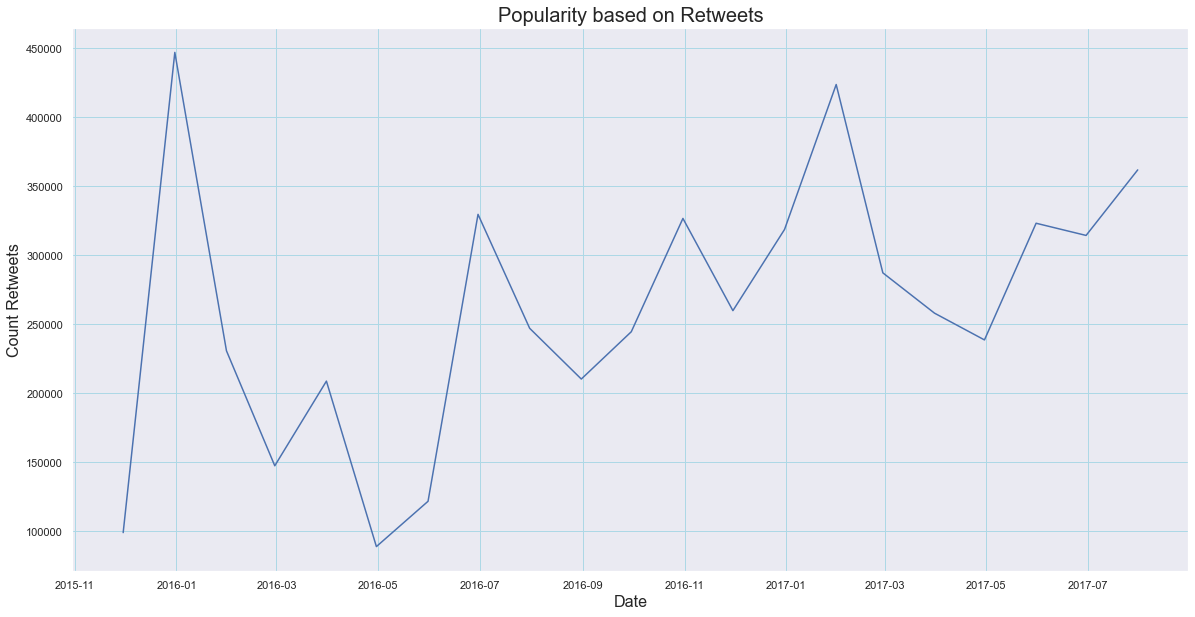

In [197]:
#Ploting:
final = final.astype({"timestamp": 'datetime64'})
retweets = final.groupby(pd.Grouper(key='timestamp',
                                    freq='m'))['retweet_count'].sum().reset_index().sort_values('timestamp')[:-1]

plt.subplots(figsize=(20, 10))
plt.plot(retweets.timestamp, retweets.retweet_count)
plt.grid(b=True, color='lightblue')
plt.title('Popularity based on Retweets', size=20)
plt.xlabel('Date', size=16)
plt.ylabel('Count Retweets', size=16)


<a id='q2'></a>
### Question 2: What about the most retweeted dog?

In [163]:
final['retweet_count'].describe()

count     1663.000000
mean      3308.139507
std       5144.547188
min         16.000000
25%        788.500000
50%       1813.000000
75%       3832.000000
max      79515.000000
Name: retweet_count, dtype: float64

In [164]:
data.retweet_count.sort_values(ascending=False)

792     79515
415     56625
822     52360
323     48265
60      45849
347     42228
417     37911
661     33421
115     32883
1369    31989
354     31314
1330    30742
468     27728
99      27680
141     25661
1242    24514
821     24319
411     24069
715     24013
130     21840
346     21794
1313    21324
38      21298
495     21156
963     20500
310     19669
277     19297
154     19196
1394    18963
428     18876
22      18781
284     18627
586     18497
1638    18285
658     17919
851     17621
1357    17605
357     17504
1230    17465
68      17300
327     17209
7       16716
463     16628
51      16570
34      16439
377     16267
1310    15839
116     15546
448     15351
700     15071
142     14740
513     14409
1052    14198
546     13616
1125    13517
402     13369
672     13140
191     13076
540     12953
286     12882
541     12643
704     12621
106     12518
280     12224
47      12118
21      12082
514     12014
92      11918
302     11878
315     11848
201     11633
689   

In [215]:
# Looking for the data of this very popular dog
print(final.loc[792,'jpg_url'])
print(final.loc[792, ])
print(final.loc[792,'text'])
print(final.loc[792,'expanded_urls'])

https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
tweet_id                                             744234799360020481
timestamp                                           2016-06-18 18:26:18
source                <a href="http://twitter.com/download/iphone" r...
text                  Here's a doggo realizing you can stand in a po...
expanded_urls         https://twitter.com/dog_rates/status/744234799...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                                NaN
stage                                                             doggo
jpg_url               https://pbs.twimg.com/ext_tw_video_thumb/74423...
breed                                                Labrador_retriever
confidence                                                     0.825333
retweet_count                                   

In [212]:
# Saving the photo of this champion
img_data = requests.get('https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg').content
with open('top1RT.jpg', 'wb') as handler:
    handler.write(img_data)

<a id='q3'></a>
### Question 3: What are the top 5 most rated breeds?

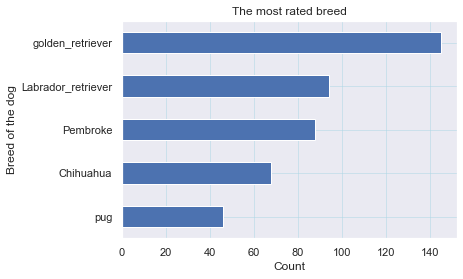

In [218]:
# Ploting:
raza = final.groupby('breed').filter(lambda x: len(x) >= 46)

raza['breed'].value_counts(ascending=True).plot(kind = 'barh')
plt.title('The most rated breed')
plt.xlabel('Count')
plt.ylabel('Breed of the dog')
plt.grid(b=True,color='lightblue', linewidth=0.5)

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

<a id='q4'></a>
### Question 4: What is the most popular stage in dog's life?

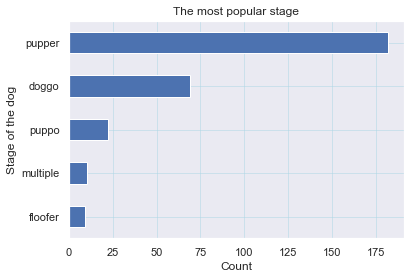

In [219]:
final['stage'].value_counts(ascending=True).plot(kind = 'barh')
plt.title('The most popular stage')
plt.xlabel('Count')
plt.ylabel('Stage of the dog')
plt.grid(b=True, color='lightblue', linewidth=0.5)
fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

<a id='q5'></a>
### Question 5: Are the high rated dogs the ones who are most favorited on twitter?

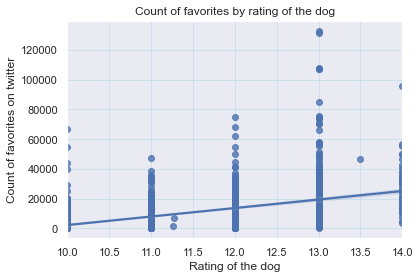

In [205]:
# Plotting:

grafi = sns.regplot(x="rating_numerator", y="favorite_count", data=final)
grafi.set_xlabel("Rating of the dog")
grafi.set_ylabel("Count of favorites on twitter")
grafi.set_title("Count of favorites by rating of the dog")
plt.grid(b=True, color='lightblue', linewidth=0.5)


<a id='q6'></a>
### Question 6: Is there a relationship between retweets and favorites?

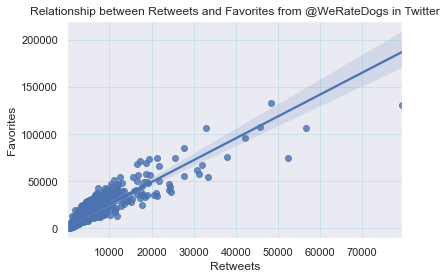

In [209]:
# Plotting
grafo = sns.regplot(x="retweet_count", y="favorite_count", data=final)
grafo.set_xlabel("Retweets")
grafo.set_ylabel("Favorites")
grafo.set_title("Relationship between Retweets and Favorites from @WeRateDogs in Twitter")
plt.grid(b=True, color='lightblue', linewidth=0.5)

<a id='q7'></a>
### Question 7: Who are the most favorited dogs (Top 5)?

In [158]:
#Those index are the top 5 dogs with more favorites and they are the ones that have get more than 100.000 favs!!
data.favorite_count.sort_values(ascending=False)

323     132810
792     131075
60      107956
415     107015
115     106827
347      95450
99       85011
417      75639
141      75193
822      75163
38       74423
277      73397
68       71144
22       69871
34       68152
1369     67100
130      66437
1330     61794
284      58302
354      57622
7        56848
310      56413
468      55683
106      55098
661      55016
116      54720
50       51522
51       50199
346      49960
428      49774
1638     49720
191      48410
154      47844
411      47281
21       46959
41       46860
47       45880
851      44619
102      43710
821      43694
3        42908
67       42876
201      42022
89       41606
715      41080
4        41048
377      40402
302      40325
286      40241
1310     39726
402      39640
0        39467
92       39090
328      38832
12       38818
1242     38551
357      38260
282      38074
43       37914
495      37818
101      37771
131      37744
230      37277
163      37198
31       36689
463      36177
147      3

In [159]:
# Creting a list with the indexes:
index_top5 = [323, 792, 60, 415, 115]

In [191]:
# Using a function to get the url of the photos
index_top5 = [323, 792, 60, 415, 115]
def top5favs(index_top5):
    for ind in index_top5:
        print(final.loc[ind,'jpg_url'])
        
top5favs(index_top5)


https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg
https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg


In [194]:
# Saving the photos

img_data = requests.get('https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg').content
with open('top1.jpg', 'wb') as handler:
    handler.write(img_data)
    
    img_data = requests.get('https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg').content
with open('top2.jpg', 'wb') as handler:
    handler.write(img_data)
    
img_data = requests.get('https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg').content
with open('top3.jpg', 'wb') as handler:
    handler.write(img_data)
    
img_data = requests.get('https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg').content
with open('top4.jpg', 'wb') as handler:
    handler.write(img_data)
    
img_data = requests.get('https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg').content
with open('top5.jpg', 'wb') as handler:
    handler.write(img_data)

In [187]:
# Selecting some info about the super top 5 dogs (to know them better):
tops = final.loc[index_top5, ["text",
                              "expanded_urls",
                              "name",
                              "stage",
                              "breed",
                              "favorite_count"]]
tops

,text,expanded_urls,name,stage,breed,favorite_count
323,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,NaN,puppo,Lakeland_terrier,132810
792,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,NaN,doggo,Labrador_retriever,131075
60,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,Duddles,NaN,English_springer,107956
415,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,Stephan,NaN,Chihuahua,107015
115,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,Jamesy,pupper,French_bulldog,106827
